In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Регрессия, низкоуровневая реализация

In [35]:
Y=torch.Tensor(np.random.randn(2,5))
X=torch.Tensor(np.random.randn(2,3))
W=torch.Tensor(np.random.randn(3,5)).requires_grad_(True)
lam=0.01
los1=[]
for i in range(100):
    
    pred=X.matmul(W)
    pred_loss=torch.sum((pred-Y)**2)
    reg_loss=lam*torch.sum(torch.abs(W))
    loss=pred_loss+reg_loss
    #print(loss.cpu().detach().numpy())
    los1.append(loss.cpu().detach().numpy())
    loss.backward()
    W.data.add_(-lam*W.grad.data)
    W.grad.zero_()

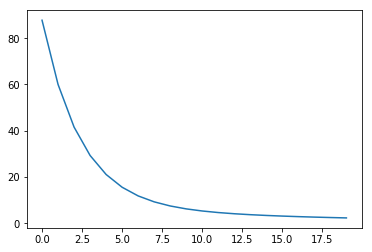

In [36]:
plt.plot(los1[:20])
plt.show()

In [37]:
print(X.matmul(W))
print('---------------------------------------------------------------------------------------')
print(Y)

tensor([[-1.4382, -0.8663, -1.3113,  0.3126, -0.1789],
        [ 0.4597,  0.5414,  0.3836,  1.3760, -0.3026]], grad_fn=<MmBackward>)
---------------------------------------------------------------------------------------
tensor([[-1.4419, -0.8701, -1.3163,  0.3107, -0.1881],
        [ 0.4852,  0.5833,  0.4214,  1.3852, -0.2252]])


In [38]:
import torch.optim as optim

In [39]:
X

tensor([[-1.9596, -1.6313,  1.6799],
        [ 0.4341,  0.2232,  1.2217]])

In [55]:
y=Y
y

tensor([[-1.4419, -0.8701, -1.3163,  0.3107, -0.1881],
        [ 0.4852,  0.5833,  0.4214,  1.3852, -0.2252]])

# Регрессия на PYTORCH (Иногда сходится иногда нет)

In [117]:

nn=torch.nn.Sequential(  
torch.nn.Linear(3,10),
torch.nn.ReLU(),
torch.nn.Linear(10,20),
torch.nn.ReLU(),    
torch.nn.Linear(20,8),
torch.nn.ReLU(),    
torch.nn.Linear(8,3),
torch.nn.ReLU() ,
    torch.nn.Linear(3,5)
#  torch.nn.ReLU()   
)

optimizer=optim.Adagrad(nn.parameters(),lr=0.01,weight_decay=0.05)
loss2=[]
for i in range(10000):
    optimizer.zero_grad()
    pred=nn(X)
    criterion=torch.nn.MSELoss()#CrossEntropyLoss()
    loss=criterion(pred,Y)
    loss2.append(loss.item())
    #print(loss.item())
    loss.backward()
    optimizer.step()

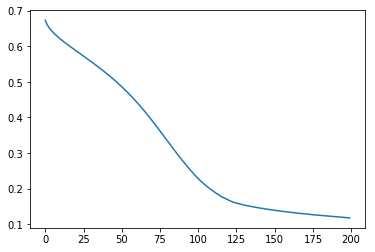

In [118]:
plt.plot(loss2[:200])
plt.show()

In [119]:
print(nn(X))
print('---------------------------------------------------------------------------------------')
print(Y)

tensor([[-1.3871, -0.8300, -1.2667,  0.3346, -0.1879],
        [ 0.3443,  0.4346,  0.2975,  1.0891, -0.1803]],
       grad_fn=<AddmmBackward>)
---------------------------------------------------------------------------------------
tensor([[-1.4419, -0.8701, -1.3163,  0.3107, -0.1881],
        [ 0.4852,  0.5833,  0.4214,  1.3852, -0.2252]])


# Классификация на PYTORCH

In [133]:
y=torch.LongTensor(np.random.randint(0,3,size=2))

In [134]:
print(X)
print(y)

tensor([[-1.9596, -1.6313,  1.6799],
        [ 0.4341,  0.2232,  1.2217]])
tensor([2, 1])


In [137]:
nn=torch.nn.Sequential(  
torch.nn.Linear(3,10),
torch.nn.ReLU(),
torch.nn.Linear(10,20),
torch.nn.ReLU(),    
torch.nn.Linear(20,8),
torch.nn.ReLU(),    
torch.nn.Linear(8,3),
torch.nn.ReLU() ,
torch.nn.Linear(3,3)   
)

optimizer=optim.Adagrad(nn.parameters(),lr=0.01,weight_decay=0.05)
loss2=[]
for i in range(1000):
    optimizer.zero_grad()
    pred=nn(X)
    criterion=torch.nn.CrossEntropyLoss()
    loss=criterion(pred,y)
    loss2.append(loss.item())
    #print(loss.item())
    loss.backward()
    optimizer.step()

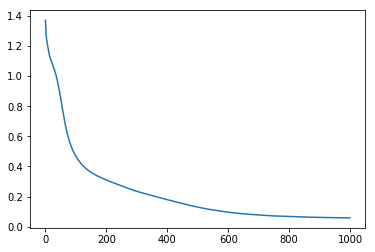

In [148]:
plt.plot(loss2[:1000])
plt.show()

In [172]:
print(nn(X))
print('---------------------------------------------------------------------------------------')
print(y)
print('---------------------------------------------------------------------------------------')
print(torch.LongTensor(np.array([nn(X)[i].argmax().item() for i in range(2)])))


tensor([[-2.4225, -1.6244,  2.3540],
        [-0.5820,  2.1085, -1.5110]], grad_fn=<AddmmBackward>)
---------------------------------------------------------------------------------------
tensor([2, 1])
---------------------------------------------------------------------------------------
tensor([2, 1])


In [155]:
X.argmax()

tensor(2)